# Scan analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture
from poly2.simulator import SimulatorOneTrait

# Dist scan

In [3]:
df = pd.read_csv('../outputs/combined/fung_scan.csv')

In [4]:
df.head()

run  year  best_dose  n_pos_diff         mu         b
0    0     1        1.0           9  17.879734  2.744068
1    0     2        1.0           9  17.879734  2.744068
2    0     3        1.0           9  17.879734  2.744068
3    0     4        1.0           9  17.879734  2.744068
4    0     5        1.0           9  17.879734  2.744068

In [5]:
noise = np.random.normal(0, 0.05, size=len(df.n_pos_diff))

processed = (
    df
    .assign(
        is_mono = lambda x: (x.n_pos_diff==9).astype(int) + 2*noise,
        n_pos_diff = lambda x: x.n_pos_diff + noise,
        best_dose = lambda x: x.best_dose + 0.1*noise,
    )
)

Text(0, 0.5, 'is monotonic?')

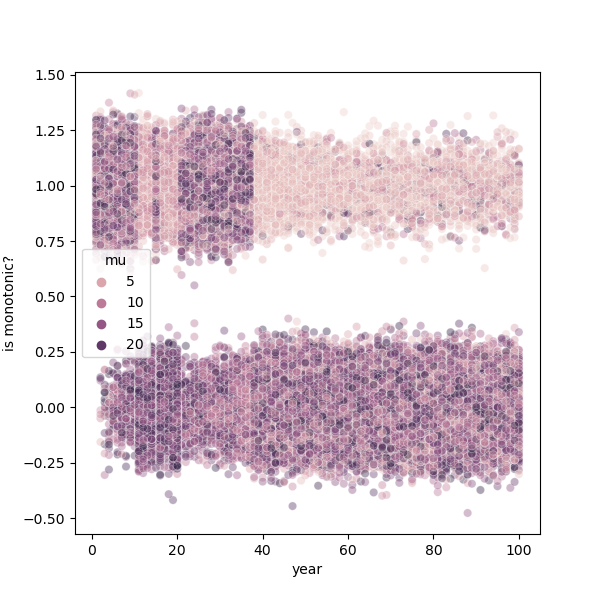

In [225]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='is_mono',
    
    # hue='b',
    hue='mu',
    
    # size='b',
    # size='mu',
    
    data=(
        processed
        # .loc[lambda x: x.mu<12]
        # .loc[lambda x: x.mu>5]
        # .loc[lambda x: x.mu>12]
        
        # .loc[lambda x: x.b>0.5]
        # .loc[lambda x: x.b<1.5]
        
        # .loc[lambda x: x.b>1]
        # .loc[lambda x: x.b>0.2]
    ),
    ax=ax,
    alpha=0.4,
)

ax.set_ylabel('is monotonic?')

Something strange happens when filtering for `mu>12`? Wonder what causes this?

Text(0, 0.5, 'N positive diffs (yield dose i+1 > dose i)')

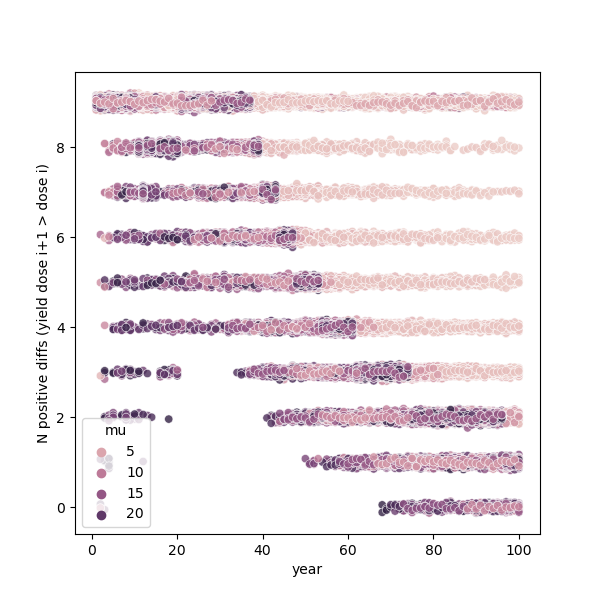

In [226]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    
    # size='b',
    
    hue='mu',
    # hue='b',
    
    data=(
        processed   
        # .loc[lambda x: x.mu>12]
        # .loc[lambda x: x.mu<12]
        # .loc[lambda x: x.mu>5]
        
        # .loc[lambda x: x.b<1.2]
        # .loc[lambda x: x.b>0.5]
    ),
    ax=ax,
    alpha=0.8,
)

ax.set_ylabel('N positive diffs (yield dose i+1 > dose i)')

(0.0, 50.0)

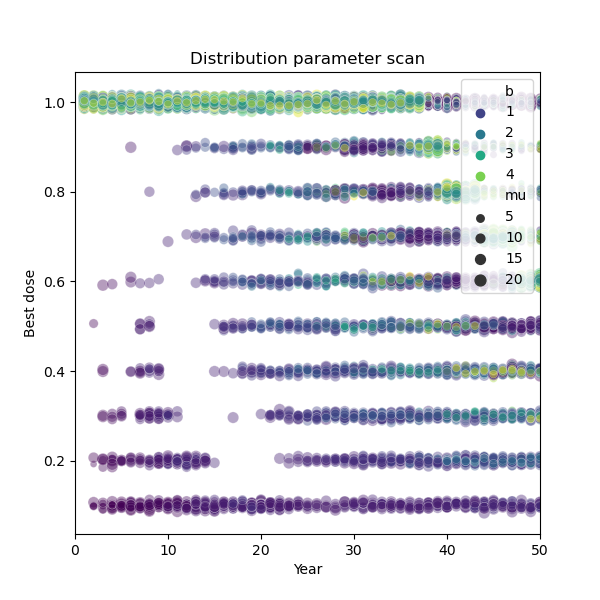

In [266]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='best_dose',
    
    hue='b',
    # hue='mu',
    
    # size='b',
    size='mu',
    
    palette='viridis',
    data=(
        processed
        # .loc[lambda x: x.mu<12]
        # .loc[lambda x: x.mu>5]
        # .loc[lambda x: x.mu>10]
        
        # .loc[lambda x: x.b>0.5]
        # .loc[lambda x: x.b<1.5]
        # .loc[lambda x: x.b>1]
        
        # .loc[lambda x: x.b>1]
        # .loc[lambda x: x.b>0.2]
    ),
    ax=ax,
    alpha=0.4,
)

ax.set_xlabel('Year')
ax.set_ylabel('Best dose')

ax.set_title('Distribution parameter scan')

ax.legend(loc='upper right')

ax.set_xlim([0,50])

In [267]:
f.savefig('../figures/rough/dist_pars.jpg')

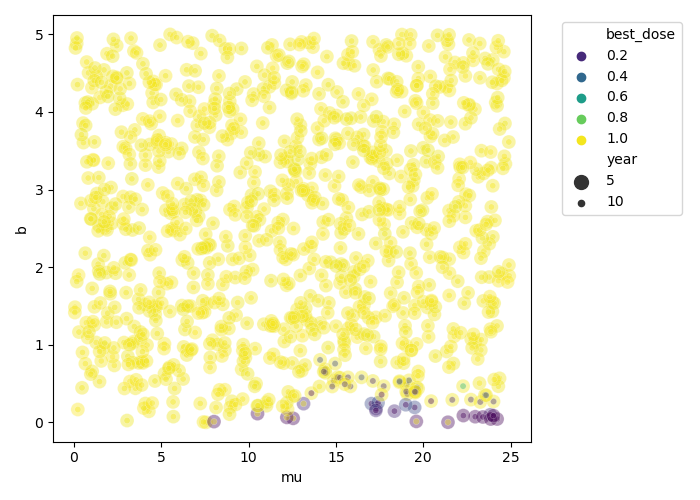

In [56]:
f, ax = plt.subplots(figsize=(7, 5))

dfu = processed.loc[lambda x: x.year.isin([5, 10])]

sns.scatterplot(
    x='mu',
    y='b',
    hue='best_dose',
    # style='year',
    size='year',
    data=dfu,
    # alpha=1,
    alpha=0.4,
    palette='viridis',
    sizes=(100, 20)
    # s=80,
)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

So it looks like they all start off as monotonic increasing in dose. 

Larger values of `b` take longer to become non-monotonic.

Seemingly all are heading that way so that after an intermediate amount of time low doses best.

Seemingly the ones that happen quickly are big `mu>10` and small `b<1.5`

# Fung pars scan

In [58]:
dp = pd.read_csv('../outputs/combined/fung_pars_scan.csv')

In [59]:
dp.head()

run  year  best_dose  n_pos_diff  asymptote  dec_rate_multiplier
0    0     1        1.0           9   0.548814             2.240505
1    0     2        1.0           9   0.548814             2.240505
2    0     3        1.0           9   0.548814             2.240505
3    0     4        1.0           9   0.548814             2.240505
4    0     5        1.0           9   0.548814             2.240505

In [60]:
noise_p = np.random.normal(0, 0.05, size=len(dp.n_pos_diff))

processed_p = (
    dp
    .assign(
        is_mono = lambda x: (x.n_pos_diff==9).astype(int) + 2*noise,
        n_pos_diff = lambda x: x.n_pos_diff + noise,
        best_dose = lambda x: x.best_dose + 0.15*noise,
    )
)

Text(0, 0.5, 'is monotonic?')

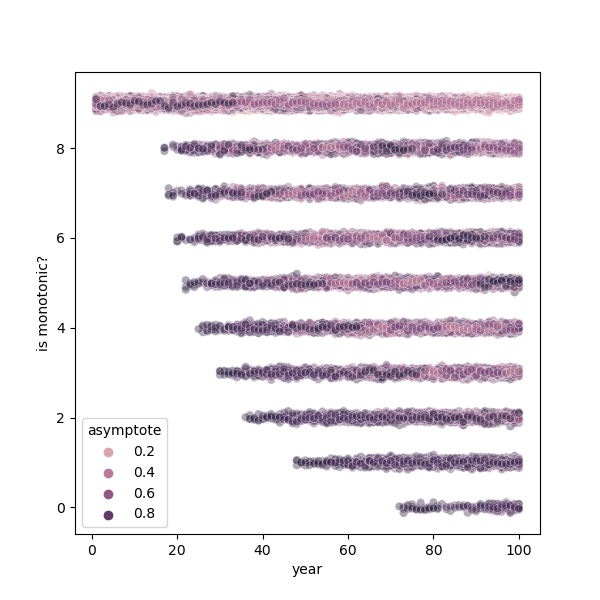

In [215]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    
    # hue='dec_rate_multiplier',
    hue='asymptote',
    
    # size='b',
    # size='mu',
    
    data=(
        processed_p
        # .loc[lambda x: x.mu<12]
        # .loc[lambda x: x.mu>5]
        
        # .loc[lambda x: x.b>3]
        # .loc[lambda x: x.b>0.2]
    ),
    ax=ax,
    alpha=0.4,
)

ax.set_ylabel('is monotonic?')

Text(0, 0.5, 'N positive diffs (yield dose i+1 > dose i)')

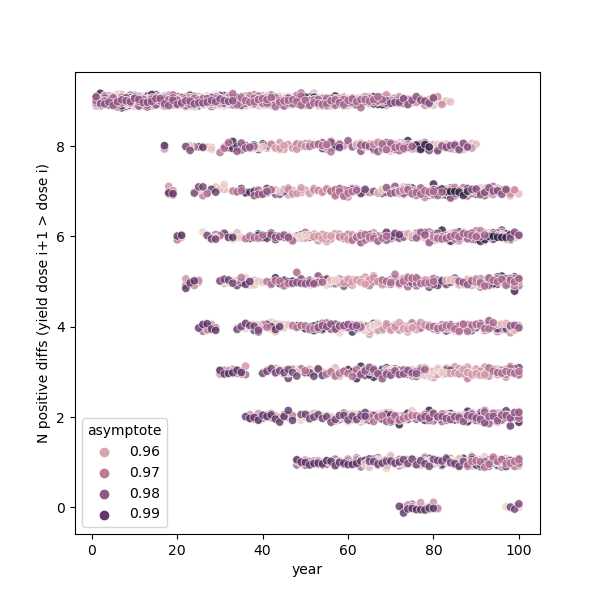

In [220]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    
    # hue='mu',
    # size='b',
    
    # hue='dec_rate_multiplier',
    hue='asymptote',
    
    data=(
        processed_p
        .loc[lambda x: x.asymptote>0.95]
        
        # .loc[lambda x: x.b<1.2]
        # .loc[lambda x: x.b>0.5]
    ),
    ax=ax,
    alpha=0.8,
)

ax.set_ylabel('N positive diffs (yield dose i+1 > dose i)')

(0.0, 50.0)

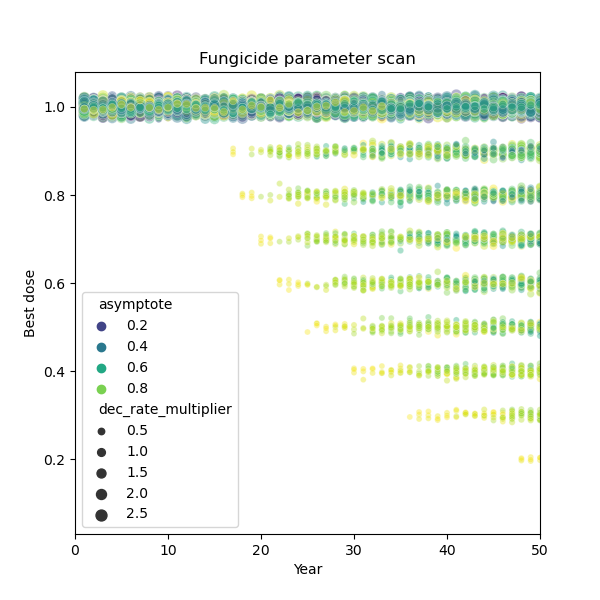

In [62]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='best_dose',
    
    # hue='dec_rate_multiplier',
    hue='asymptote',
    
    size='dec_rate_multiplier',
    
    data=(
        processed_p
        # .loc[lambda x: x.asymptote>0.8]
        # .loc[lambda x: x.mu>5]
        # .loc[lambda x: x.mu>12]
        
        # .loc[lambda x: x.b>0.5]
        # .loc[lambda x: x.b<1.5]
        
        # .loc[lambda x: x.b>1]
        # .loc[lambda x: x.b>0.2]
    ),
    ax=ax,
    palette='viridis',
    alpha=0.4,
)

ax.set_xlabel('Year')
ax.set_ylabel('Best dose')

ax.set_title('Fungicide parameter scan')

# ax.legend(loc='upper right')

ax.set_xlim([0,50])

In [263]:
f.savefig('../figures/rough/fung_pars.jpg')

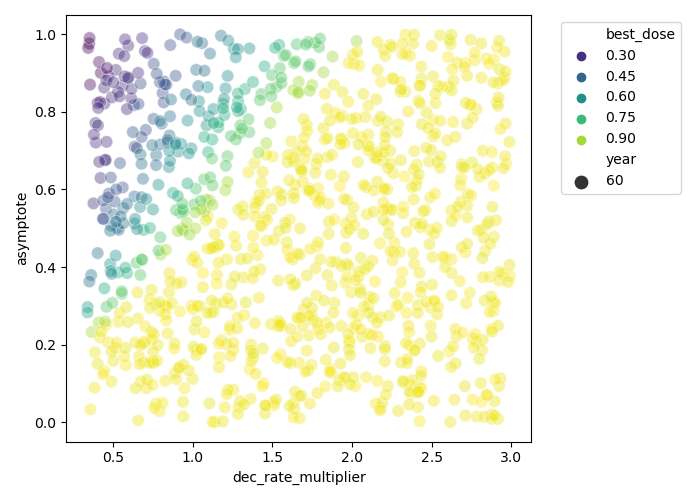

In [69]:
f, ax = plt.subplots(figsize=(7, 5))

dfu = processed_p.loc[lambda x: x.year.isin([60])]

sns.scatterplot(
    x='dec_rate_multiplier',
    y='asymptote',
    hue='best_dose',
    # style='year',
    size='year',
    data=dfu,
    # alpha=1,
    alpha=0.4,
    palette='viridis',
    sizes=(80, 20)
    # s=100,
)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

So seemingly low doses become better more quickly for low decay rates. More selection if fungicide lingers for longer, so then high doses become relatively poorer? But there is also this trade off with control so not completely obvious.

But still doesn't happen for almost 20 years.

Happens faster for bigger asymptotes - relatively increased selection due to bigger diff between dose response curves.

# Mutation scan

In [70]:
dm = pd.read_csv('../outputs/combined/mut_pars_scan.csv')

In [71]:
dm.head()

run  year  best_dose  n_pos_diff  m_prop_multiplier  m_scale_multiplier
0    0     1        1.0           9           1.252065            2.693883
1    0     2        1.0           9           1.252065            2.693883
2    0     3        1.0           9           1.252065            2.693883
3    0     4        1.0           9           1.252065            2.693883
4    0     5        1.0           9           1.252065            2.693883

In [72]:
noise_m = np.random.normal(0, 0.05, size=len(dm.n_pos_diff))

processed_m = (
    dm
    .assign(
        is_mono = lambda x: (x.n_pos_diff==9).astype(int) + 2*noise,
        n_pos_diff = lambda x: x.n_pos_diff + noise,
        best_dose = lambda x: x.best_dose + 0.15*noise,
    )
)

Text(0, 0.5, 'is monotonic?')

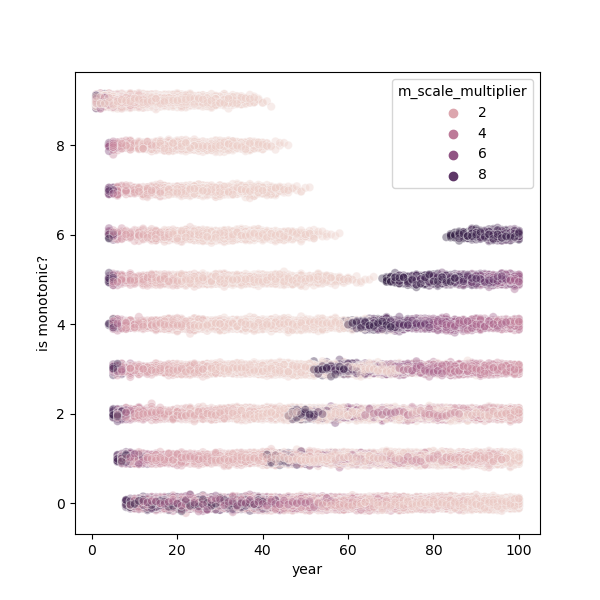

In [192]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    
    # hue='m_prop_multiplier',
    hue='m_scale_multiplier',
    
    # size='b',
    # size='mu',
    
    data=(
        processed_m
        # .loc[lambda x: x.m_scale_multiplier>1]
        # .loc[lambda x: x.mu>5]
        
        # .loc[lambda x: x.b>3]
        # .loc[lambda x: x.b>0.2]
    ),
    ax=ax,
    alpha=0.4,
)

ax.set_ylabel('is monotonic?')

More rapid change to low better if mutation scale or prop are higher

Text(0, 0.5, 'N positive diffs (yield dose i+1 > dose i)')

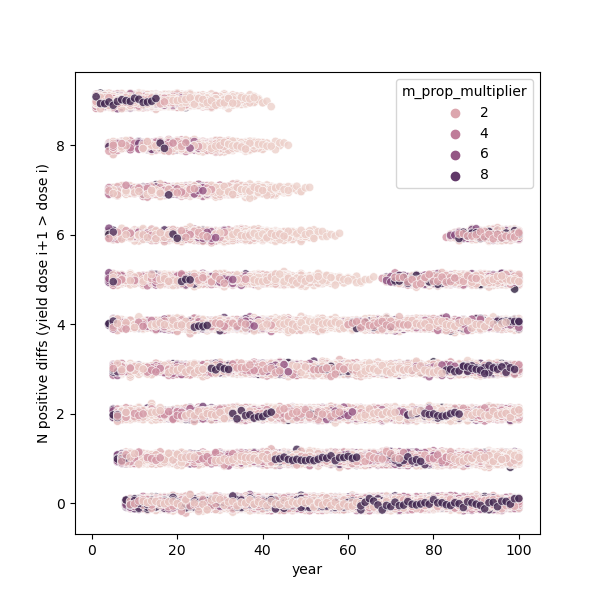

In [193]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    
    # hue='mu',
    # size='b',
    
    hue='m_prop_multiplier',
    # hue='m_scale_multiplier',
    
    data=(
        processed_m
        # .loc[lambda x: x.asymptote>0.95]
        
        # .loc[lambda x: x.b<1.2]
        # .loc[lambda x: x.b>0.5]
    ),
    ax=ax,
    alpha=0.8,
)

ax.set_ylabel('N positive diffs (yield dose i+1 > dose i)')

(0.0, 50.0)

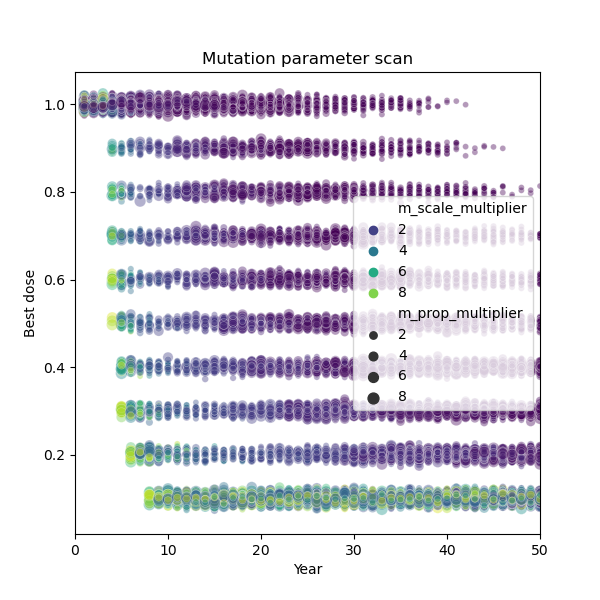

In [73]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='best_dose',
    
    size='m_prop_multiplier',
    
    # hue='m_prop_multiplier',
    hue='m_scale_multiplier',
    
    data=(
        processed_m
        # .loc[lambda x: x.m_prop_multiplier>1]
        # .loc[lambda x: x.m_scale_multiplier>1]
        # .loc[lambda x: x.m_scale_multiplier<3]
        
        # .loc[lambda x: x.b<1.2]
        # .loc[lambda x: x.b>0.5]
    ),
    ax=ax,
    alpha=0.4,
    palette='viridis',
)

ax.set_xlabel('Year')
ax.set_ylabel('Best dose')

ax.set_title('Mutation parameter scan')

ax.legend(loc='right')

ax.set_xlim([0,50])

In [265]:
f.savefig('../figures/rough/mut_pars.jpg')

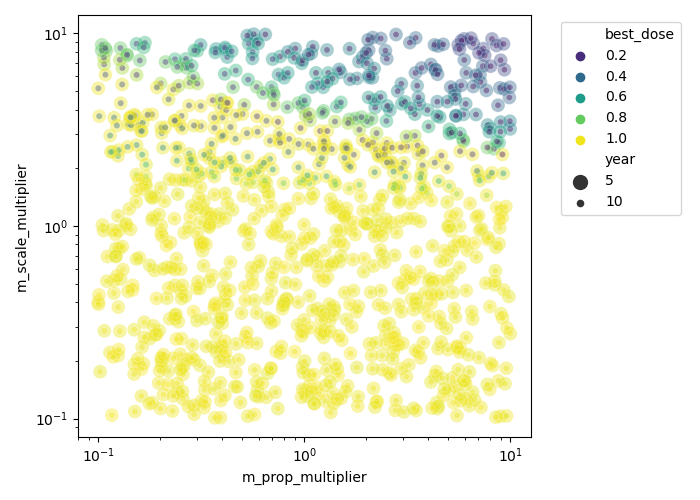

In [81]:
f, ax = plt.subplots(figsize=(7, 5))

dfu = processed_m.loc[lambda x: x.year.isin([5, 10])]

sns.scatterplot(
    x='m_prop_multiplier',
    y='m_scale_multiplier',
    hue='best_dose',
    # style='year',
    size='year',
    data=dfu,
    # alpha=1,
    alpha=0.4,
    palette='viridis',
    sizes=(100, 20)
    # s=100,
)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_xscale('log')
ax.set_yscale('log')


plt.tight_layout()

Possible rebound effect? Would need to investigate more closely distributions etc, but suspect basically lots of density near 1 and then high becomes better again

# Scan over all

In [92]:
dfa = pd.read_csv('../outputs/combined/scan_all.csv')

dfa.head()

run  year  best_dose  n_pos_diff         mu         b  asymptote  \
0    0     1        1.0           9  17.879734  2.744068   0.602763   
1    0     2        1.0           9  17.879734  2.744068   0.602763   
2    0     3        1.0           9  17.879734  2.744068   0.602763   
3    0     4        1.0           9  17.879734  2.744068   0.602763   
4    0     5        1.0           9  17.879734  2.744068   0.602763   

   dec_rate_multiplier  m_prop_multiplier  m_scale_multiplier  
0             1.786355           0.703574             1.95789  
1             1.786355           0.703574             1.95789  
2             1.786355           0.703574             1.95789  
3             1.786355           0.703574             1.95789  
4             1.786355           0.703574             1.95789

In [79]:
noise_a = np.random.normal(0, 0.05, size=len(dm.n_pos_diff))

processed_a = (
    dfa
    .assign(
        is_mono = lambda x: (x.n_pos_diff==9).astype(int) + 2*noise,
        n_pos_diff = lambda x: x.n_pos_diff + noise,
        best_dose = lambda x: x.best_dose + 0.15*noise,
    )
)

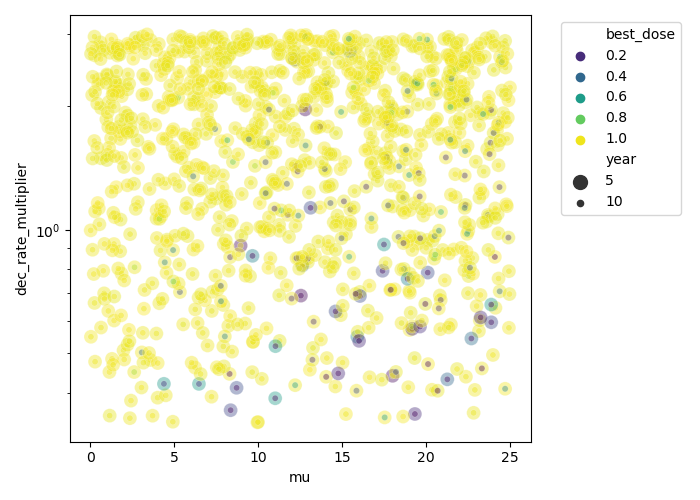

In [91]:
f, ax = plt.subplots(figsize=(7, 5))

dfa2 = processed_a.loc[lambda x: x.year.isin([5, 10])]

sns.scatterplot(
    x='mu',
    # x='dec_rate_multiplier',
    # x='asymptote',
    # x='mu',
    # x='b',
    y='dec_rate_multiplier',
    hue='best_dose',
    # style='year',
    size='year',
    data=dfa2,
    # alpha=1,
    alpha=0.4,
    palette='viridis',
    sizes=(100, 20)
    # s=100,
)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()

# Conclusions

If want low dose to become better faster, choose:

- low decay rate
- high asymptote (or =1)
- high mutation prop
- high mutation scale
- `b<1`
- higher values `mu` (i think?)


# To do next

Check a beta distribution instead of gamma

Check what happens when polygenic trait affects asymptote not curvature - suspect then low doses much better